# Linear Models and Validation

**Author:** Himanshu Singhal

# Preamble
We'll be loading some CO2 concentration data that is a commonly used dataset for model building of time series prediction. 

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from datetime import datetime, timedelta
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
sns.set_context('notebook')

# Fetch the data 
mauna_lao = fetch_openml('mauna-loa-atmospheric-co2')
# print(mauna_lao.DESCR)
data = mauna_lao.data
# Assemble the day/time from the data columns so we can plot it
d1958 = datetime(year=1958,month=1,day=1)
time = [datetime(int(d[0]),int(d[1]),int(d[2])) for d in data] 
X = np.array([1958+(t-d1958)/timedelta(days=365.2425) for t in time]).T
X = X.reshape(-1,1)  # Make it a column to make scikit happy
y = np.array(mauna_lao.target)
print(y.shape)

(2225,)


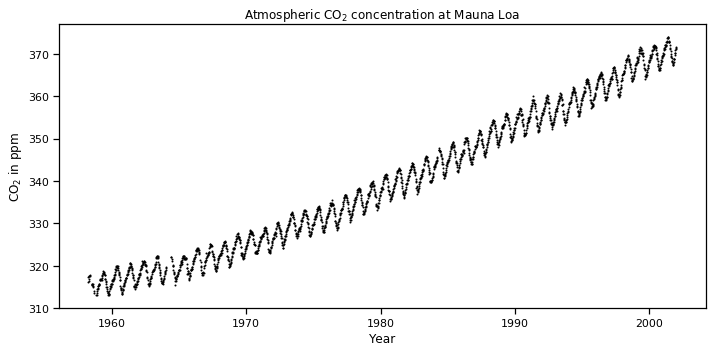

In [2]:
# Plot the data
plt.figure(figsize=(10,5))    # Initialize empty figure
plt.scatter(X, y, c='k',s=1) # Scatterplot of data
plt.xlabel("Year")
plt.ylabel(r"CO$_2$ in ppm")
plt.title(r"Atmospheric CO$_2$ concentration at Mauna Loa")
plt.tight_layout()
plt.show()

# Linear Models

Construct the following linear models:
1. Model 1: "Vanilla" Linear Regression, that is, where $CO_2 = a+b \cdot time$
2. Model 2: Quadratic Regression, where $CO_2 = a+b \cdot t + c\cdot t^2$

Evauate these models using **the appropriate kind of Cross Validation** for each of the following amounts of Training data:
1. N=50 Training Data Points
2. N=100
3. N=200
4. N=500
5. N=1000
6. N=2000

# Model 1 and 2

coefficient of determination for Model 1_50: 0.9725506560877514
coefficient of determination for Model 1_100: 0.9727096449899653
coefficient of determination for Model 1_200: 0.9736410275960862
coefficient of determination for Model 1_500: 0.9737718978875509
coefficient of determination for Model 1_1000: 0.9735073843069603
coefficient of determination for Model 1_2000: 0.9714871328463002
MSE for Model 1: [7.87617538 7.8171891  7.56027508 7.55969169 7.64941009 7.65493291]
MSE for model 1: [7.69077267 7.85013633 8.46271015 7.80647587 7.5793298  7.60544692]
MSE test for model 2: [5.00933738 5.02032653 5.02100097 4.9983321  4.95550918 5.04212658]
MSE train for model 2: [4.29458738 4.41844288 4.71255599 4.97583059 5.03953941 4.98777984]


<Figure size 432x288 with 0 Axes>

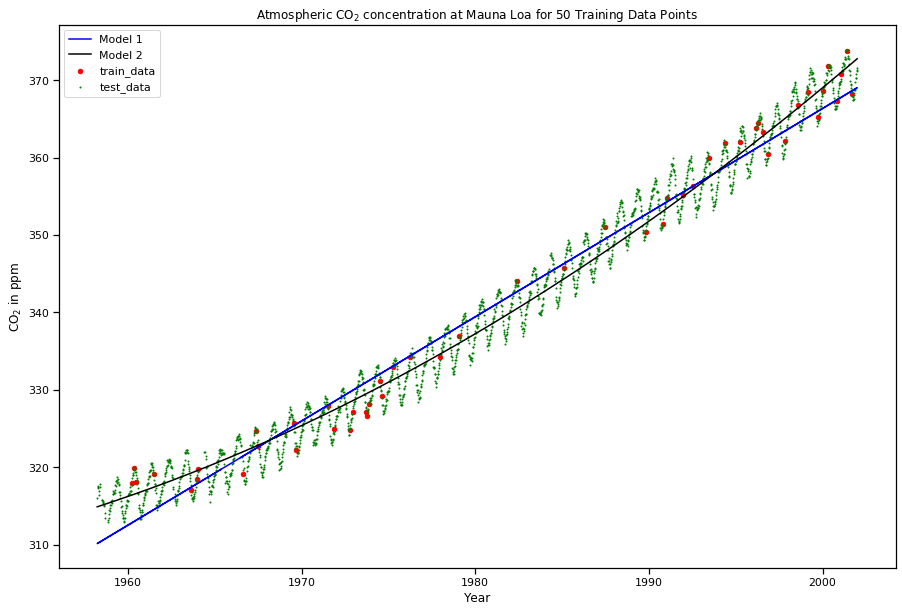

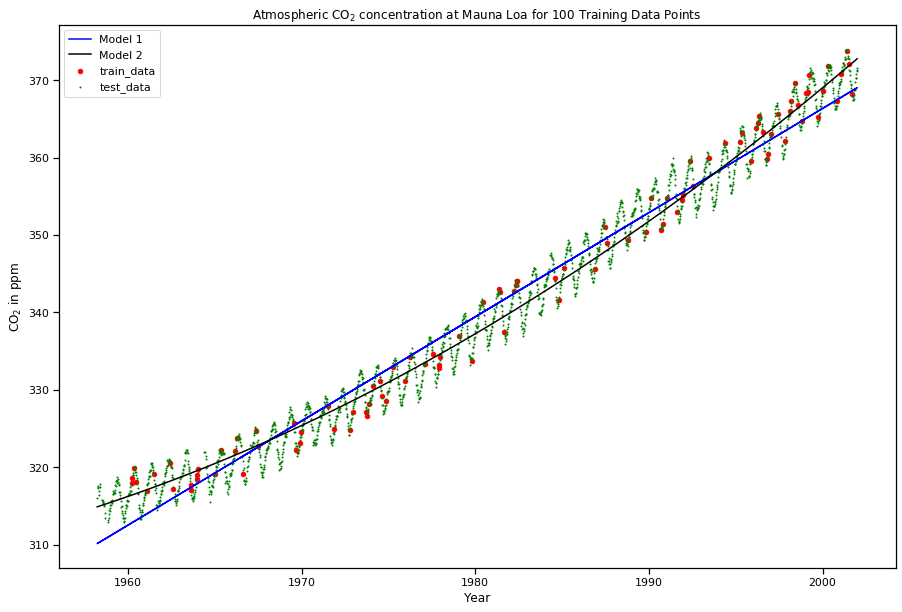

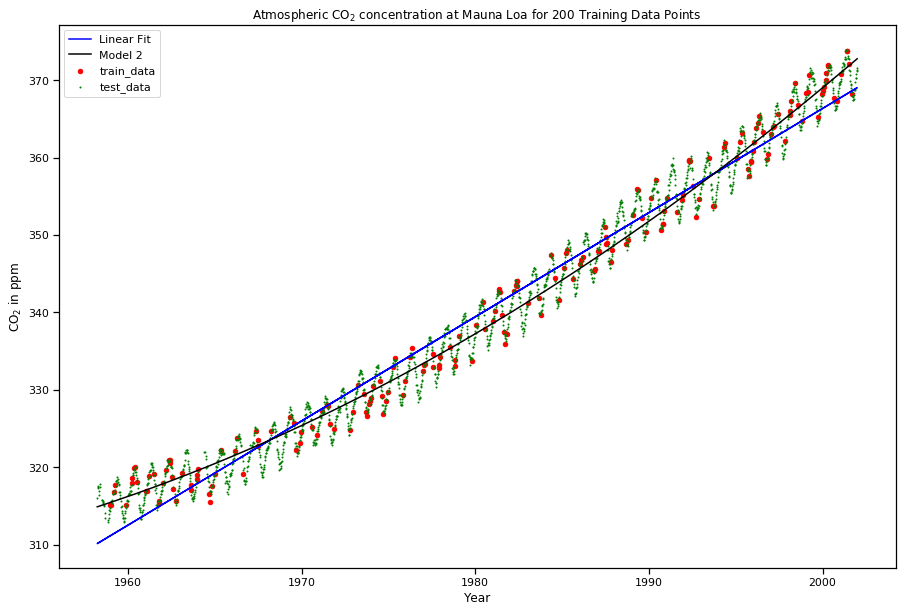

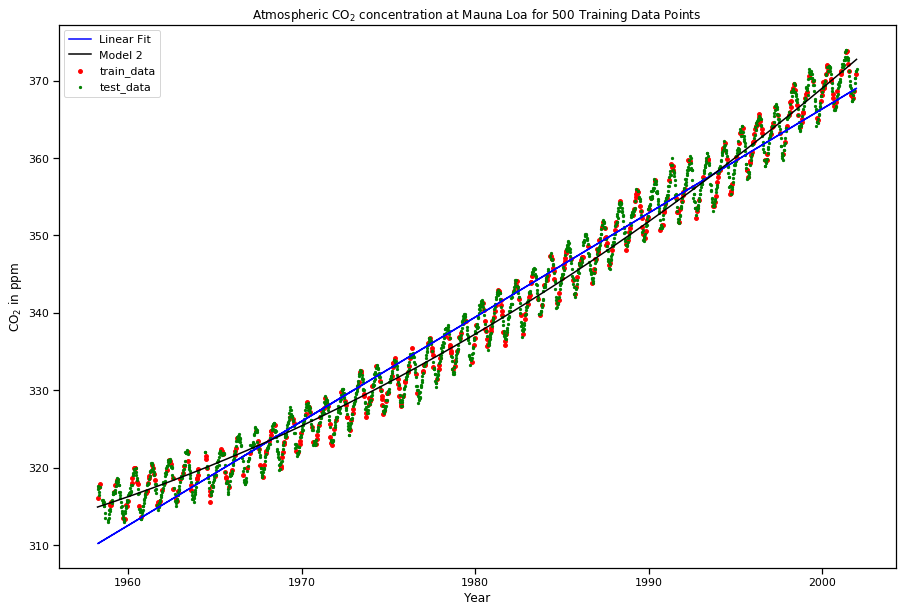

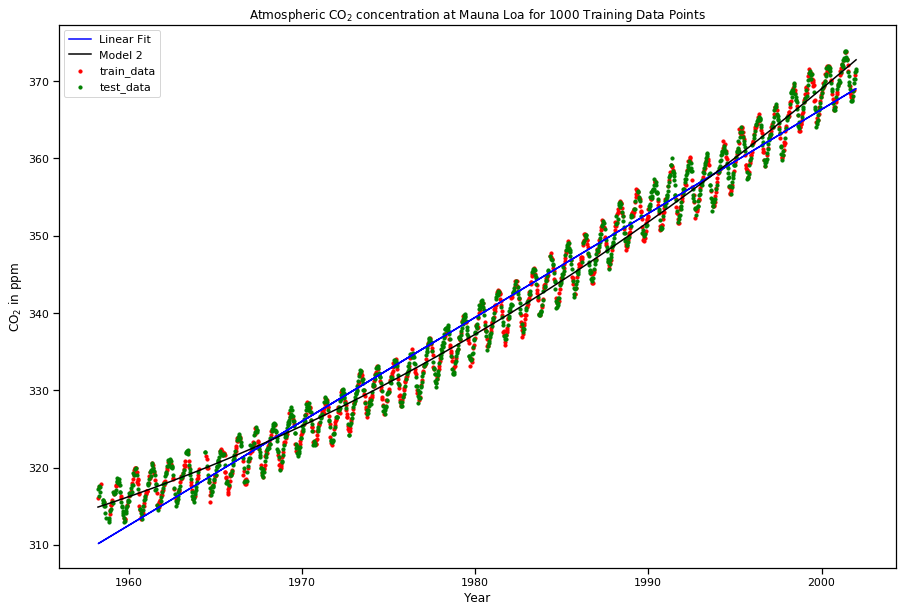

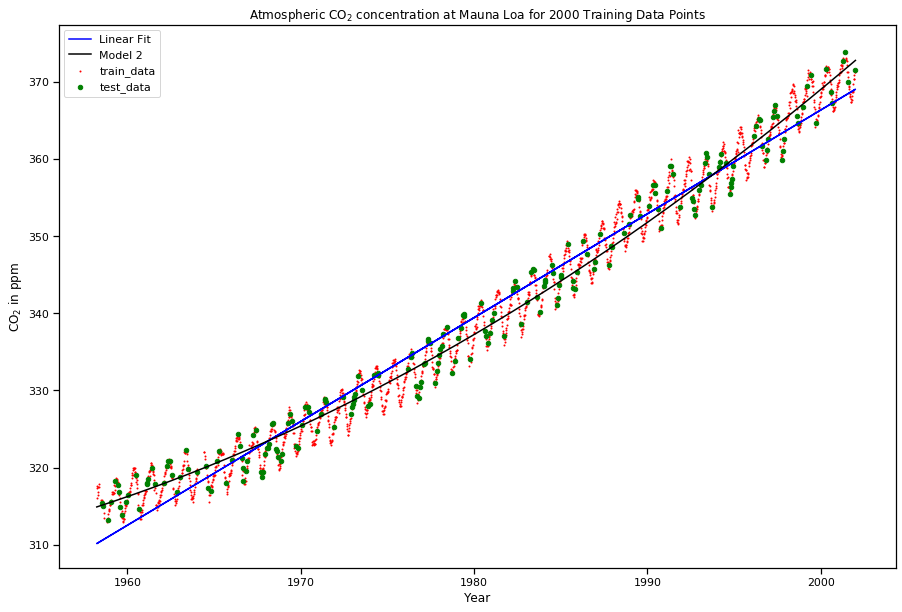

In [9]:
# Splitting the dataset into the Training set and Test set for model 1 and model 3
from sklearn.model_selection import train_test_split 
X_train50, X_test2175, y_train50, y_test2175 = train_test_split(X, y, train_size=50, random_state=0)
X_train100, X_test2125, y_train100, y_test2125 = train_test_split(X, y, train_size=100, random_state=0)
X_train200, X_test2025, y_train200, y_test2025 = train_test_split(X, y, train_size=200, random_state=0)
X_train500, X_test1725, y_train500, y_test1725 = train_test_split(X, y, train_size=500, random_state=0)
X_train1000, X_test1225, y_train1000, y_test1225 = train_test_split(X, y, train_size=1000, random_state=0)
X_train2000, X_test225, y_train2000, y_test225 = train_test_split(X, y, train_size=2000, random_state=0)
# print("Length of X:",len(X))
# print("Length of X_train:",len(X_train))
# print("Length of X_test:",len(X_test))

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

Test_MSE1 = []
Train_MSE1 = []
Train_MSE2 = []
Test_MSE2 = []

# Fitting Linear Regression to Model 1
# Training set 50
lin_reg = LinearRegression()
model_1_50 = lin_reg.fit(X_train50, y_train50)
r_sq_1_50 = model_1_50.score(X_test2175, y_test2175)
Te_MSE_2175 = mean_squared_error(lin_reg.predict(X_test2175),y_test2175)
Tr_MSE_50 = mean_squared_error(lin_reg.predict(X_train50),y_train50)    
print('coefficient of determination for Model 1_50:', r_sq_1_50)
Test_MSE1 = np.append(Test_MSE1,Te_MSE_2175)
Train_MSE1 = np.append(Train_MSE1,Tr_MSE_50)

# Training set 100
model_1_100 = lin_reg.fit(X_train100, y_train100)
r_sq_1_100 = model_1_100.score(X_test2125, y_test2125)
Te_MSE_2125 = mean_squared_error(lin_reg.predict(X_test2125),y_test2125)
Tr_MSE_100 = mean_squared_error(lin_reg.predict(X_train100),y_train100)
print('coefficient of determination for Model 1_100:', r_sq_1_100)
Test_MSE1 = np.append(Test_MSE1,Te_MSE_2125)
Train_MSE1 = np.append(Train_MSE1,Tr_MSE_100)

# Training set 200
model_1_200 = lin_reg.fit(X_train200, y_train200)
r_sq_1_200 = model_1_200.score(X_test2025, y_test2025)
Te_MSE_2025 = mean_squared_error(lin_reg.predict(X_test2025),y_test2025)
Tr_MSE_200 = mean_squared_error(lin_reg.predict(X_train200),y_train200)   
print('coefficient of determination for Model 1_200:', r_sq_1_200)
Test_MSE1 = np.append(Test_MSE1,Te_MSE_2025)
Train_MSE1 = np.append(Train_MSE1,Tr_MSE_200)

# Training set 500
model_1_500 = lin_reg.fit(X_train500, y_train500)
r_sq_1_500 = model_1_500.score(X_test1725, y_test1725)
Te_MSE_1725 = mean_squared_error(lin_reg.predict(X_test1725),y_test1725)
Tr_MSE_500 = mean_squared_error(lin_reg.predict(X_train500),y_train500)     
print('coefficient of determination for Model 1_500:', r_sq_1_500)
Test_MSE1 = np.append(Test_MSE1,Te_MSE_1725)
Train_MSE1 = np.append(Train_MSE1,Tr_MSE_500)

# Training set 10000
model_1_1000 = lin_reg.fit(X_train1000, y_train1000)
Te_MSE_1225 = mean_squared_error(lin_reg.predict(X_test1225),y_test1225)
Tr_MSE_1000 = mean_squared_error(lin_reg.predict(X_train1000),y_train1000)    
r_sq_1_1000 = model_1_1000.score(X_test1225, y_test1225)   
print('coefficient of determination for Model 1_1000:', r_sq_1_1000)
Test_MSE1 = np.append(Test_MSE1,Te_MSE_1225)
Train_MSE1 = np.append(Train_MSE1,Tr_MSE_1000)

# Training set 2000
model_1_2000 = lin_reg.fit(X_train2000, y_train2000)
Te_MSE_225 = mean_squared_error(lin_reg.predict(X_test225),y_test225)
Tr_MSE_2000 = mean_squared_error(lin_reg.predict(X_train2000),y_train2000)
r_sq_1_2000 = model_1_2000.score(X_test225, y_test225)  
print('coefficient of determination for Model 1_2000:', r_sq_1_2000)
Test_MSE1 = np.append(Test_MSE1,Te_MSE_225)
Train_MSE1 = np.append(Train_MSE1,Tr_MSE_2000)

print('MSE for Model 1:' ,(Test_MSE1))
print('MSE for model 1:', (Train_MSE1))

# Model 2
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train50)
pol_reg = LinearRegression()
pipeline = Pipeline([("polynomial features",poly_reg),
                    ("linear features",pol_reg)])
pipeline.fit(X_train50,y_train50)
prediction = pipeline.predict(X_test2175)

Te_M2_2175 = mean_squared_error(pipeline.predict(X_test2175),y_test2175)
Tr_M2_50 = mean_squared_error(pipeline.predict(X_train50),y_train50) 
Test_MSE2 = np.append(Test_MSE2,Te_M2_2175)
Train_MSE2 = np.append(Train_MSE2,Tr_M2_50)

Te_M2_2125 = mean_squared_error(pipeline.predict(X_test2125),y_test2125)
Tr_M2_100 = mean_squared_error(pipeline.predict(X_train100),y_train100) 
Test_MSE2 = np.append(Test_MSE2,Te_M2_2125)
Train_MSE2 = np.append(Train_MSE2,Tr_M2_100)

Te_M2_2025 = mean_squared_error(pipeline.predict(X_test2025),y_test2025)
Tr_M2_200 = mean_squared_error(pipeline.predict(X_train200),y_train200) 
Test_MSE2 = np.append(Test_MSE2,Te_M2_2025)
Train_MSE2 = np.append(Train_MSE2,Tr_M2_200)

Te_M2_1725 = mean_squared_error(pipeline.predict(X_test1725),y_test1725)
Tr_M2_500 = mean_squared_error(pipeline.predict(X_train500),y_train500) 
Test_MSE2 = np.append(Test_MSE2,Te_M2_1725)
Train_MSE2 = np.append(Train_MSE2,Tr_M2_500)

Te_M2_1225 = mean_squared_error(pipeline.predict(X_test1225),y_test1225)
Tr_M2_1000 = mean_squared_error(pipeline.predict(X_train1000),y_train1000) 
Test_MSE2 = np.append(Test_MSE2,Te_M2_1225)
Train_MSE2 = np.append(Train_MSE2,Tr_M2_1000)

Te_M2_225 = mean_squared_error(pipeline.predict(X_test225),y_test225)
Tr_M2_2000 = mean_squared_error(pipeline.predict(X_train2000),y_train2000) 
Test_MSE2 = np.append(Test_MSE2,Te_M2_225)
Train_MSE2 = np.append(Train_MSE2,Tr_M2_2000)

print('MSE test for model 2:', (Test_MSE2))
print('MSE train for model 2:', (Train_MSE2))
# Visualizing the Regression results for 50 data points
plt.figure(1)
plt.figure(figsize=(15,10))
plt.scatter(X_train50, y_train50, color = 'red', s=20, label = 'train_data')
plt.scatter(X_test2175, y_test2175, color = 'green', s=1, label = 'test_data')
plt.plot(X_test2175, lin_reg.predict(X_test2175), color='blue', label = 'Model 1') 
plt.plot(X, pipeline.predict(X), color='black', label = 'Model 2') 
plt.title(r"Atmospheric CO$_2$ concentration at Mauna Loa for 50 Training Data Points")
plt.xlabel("Year")
plt.ylabel(r"CO$_2$ in ppm")
plt.legend()

# Visualizing the Regression results for 100 data points
plt.figure(2)
plt.figure(figsize=(15,10))
plt.scatter(X_train100, y_train100, color = 'red', s=20, label = 'train_data')
plt.scatter(X_test2125, y_test2125, color = 'green', s=1, label = 'test_data')
plt.plot(X_test2125, lin_reg.predict(X_test2125), color='blue', label = 'Model 1') #linear without sine
plt.plot(X, pipeline.predict(X), color='black', label = 'Model 2') #polynomial
plt.title(r"Atmospheric CO$_2$ concentration at Mauna Loa for 100 Training Data Points")
plt.xlabel("Year")
plt.ylabel(r"CO$_2$ in ppm")
plt.legend()

# Visualizing the Regression results for 200 data points
plt.figure(3)
plt.figure(figsize=(15,10))
plt.scatter(X_train200, y_train200, color = 'red', s=20, label = 'train_data')
plt.scatter(X_test2025, y_test2025, color = 'green', s=1, label = 'test_data')
plt.plot(X_test2025, lin_reg.predict(X_test2025), color='blue', label = 'Linear Fit') #linear
plt.plot(X, pipeline.predict(X), color='black', label = 'Model 2') #polynomial
plt.title(r"Atmospheric CO$_2$ concentration at Mauna Loa for 200 Training Data Points")
plt.xlabel("Year")
plt.ylabel(r"CO$_2$ in ppm")
plt.legend()

# Visualizing the Regression results for 500 data points
plt.figure(4)
plt.figure(figsize=(15,10))
plt.scatter(X_train500, y_train500, color = 'red', s=15, label = 'train_data')
plt.scatter(X_test1725, y_test1725, color = 'green', s=5, label = 'test_data')
plt.plot(X_test1725, lin_reg.predict(X_test1725), color='blue', label = 'Linear Fit') #linear
plt.plot(X, pipeline.predict(X), color='black', label = 'Model 2') #polynomial
plt.title(r"Atmospheric CO$_2$ concentration at Mauna Loa for 500 Training Data Points")
plt.xlabel("Year")
plt.ylabel(r"CO$_2$ in ppm")
plt.legend()

# Visualizing the Regression results for 1000 data points
plt.figure(5)
plt.figure(figsize=(15,10))
plt.scatter(X_train1000, y_train1000, color = 'red', s=10, label = 'train_data')
plt.scatter(X_test1225, y_test1225, color = 'green', s=10, label = 'test_data')
plt.plot(X_test1225, lin_reg.predict(X_test1225), color='blue', label = 'Linear Fit') #linear
plt.plot(X, pipeline.predict(X), color='black', label = 'Model 2') #polynomial
plt.title(r"Atmospheric CO$_2$ concentration at Mauna Loa for 1000 Training Data Points")
plt.xlabel("Year")
plt.ylabel(r"CO$_2$ in ppm")
plt.legend()

# Visualizing the Regression results for 2000 data points
plt.figure(6)
plt.figure(figsize=(15,10))
plt.scatter(X_train2000, y_train2000, color = 'red', s=1, label = 'train_data')
plt.scatter(X_test225, y_test225, color = 'green', s=20, label = 'test_data')
plt.plot(X_test2025, lin_reg.predict(X_test2025), color='blue', label = 'Linear Fit') #linear
plt.plot(X, pipeline.predict(X), color='black', label = 'Model 2') #polynomial
plt.title(r"Atmospheric CO$_2$ concentration at Mauna Loa for 2000 Training Data Points")
plt.xlabel("Year")
plt.ylabel(r"CO$_2$ in ppm")
plt.legend()
plt.show()